## Question

(80 points) [Matrix Factorization for Network Embedding] Suppose that given a network, 𝑨 is the 𝑉 × 𝑉 adjacency matrix and 𝒛𝑢 ∈ 𝑅𝒅 is the embedding vector of vertex 𝑢 ∈ 𝑉 , where 𝑉 denotes the set of vertices. Then, we aim at finding the embedding vectors such that the following loss function is minimized:

𝐿= ∑ (𝒛𝑢𝑻𝒛𝑣−𝑨𝑢,𝑣)𝟐,

(𝑢,𝑣)∈𝑉×𝑉

where 𝑨𝑢,𝑣 is the (𝑢, 𝑣)-th element of 𝑨. That is, we are interested in finding the embedding vectors
based on matrix factorization. Use the NetworkX package to load the file “karate_club.adjlist”, which corresponds to the adjacency list, so that you work on the dataset for the Zachary’s karate club network. Perform matrix factorization via stochastic gradient descent (SGD) to find the embedding matrix whose size is 𝑉 × 𝑑. To this end, update the embedding vectors according to the following rules:

𝒛𝑢 ← 𝒛𝑢 − 𝜂𝑒𝑢,𝑣𝒛𝑣 

𝒛𝑣 ← 𝒛𝑣 − 𝜂𝑒𝑢,𝑣𝒛𝑢,

where 𝑒 = 𝒛𝑻 𝒛 − 𝑨 and 𝜂 is the learning rate. Set the dimension of each embedding vector to 𝑢,𝑣 𝑢 𝑣 𝑢,𝑣
𝑑 = 4. You may set other hyperparameters including 𝜂 arbitrarily. As the final output of this problem, plot 𝑉 points on the two-dimensional space through the t-SNE visualization tool. Make discussions on how the vertices are embedded in comparison with the figure below.
Use the Scikit-Learn package on Python by changing the default setting on ‘perplexity’ to a small value.


## Solution

In [1]:
import networkx as nx
import numpy as np

G = nx.read_adjlist("karate_club.adjlist", nodetype=int) # karate_club.adjlist 로드, 정점 타입은 int형으로 지정
A = nx.to_numpy_array(G) # 인접 행렬로 변환
V = len(A) # 노드 수
d = 4 # 임베딩 벡터의 차원 설정(문제에서 제시된 값 4로 설정)

karate_club.adjlist 파일 (노드 연결 정보 리스트 정보)을 로드하여 노드와 엣지 정보를 얻는다.

그리고 인접 행렬로 변환하여 변수 A에 저장하고 변수 V에 노드의 수를 저장한다. 임베딩 벡터 차원은 4로 설정한다.

In [2]:
# 임베딩 벡터 초기화, SGD 구현
Z = np.random.randn(V, d)
eta = 0.01 # 학습률 설정
epochs = 1000 # epoch 수 설정

for epoch in range(epochs):
    for u in range(V):
        for v in range(V):
            if u != v:
                euv = np.dot(Z[u], Z[v]) - A[u, v] # Zu, Zv 내적 값과 실제 인접 행렬 Au,v 차이 계산
                Z[u] -= eta * euv * Z[v]
                Z[v] -= eta * euv * Z[u]


임베딩 벡터를 초기화하고 SGD로 구현한다.

학습률은 0.01, 1000 epoch로 설정한다.

임베딩 벡터 업데이트 방식으로 행렬 업데이트를 진행한다.

Zu, Zv 내적 값과 실제 인접 행렬 Au,v 차이를 계산해 손실 함수 기울기를 구한다.

그 후, 문제에서 제시된 방식으로 벡터값 업데이트를 진행한다.


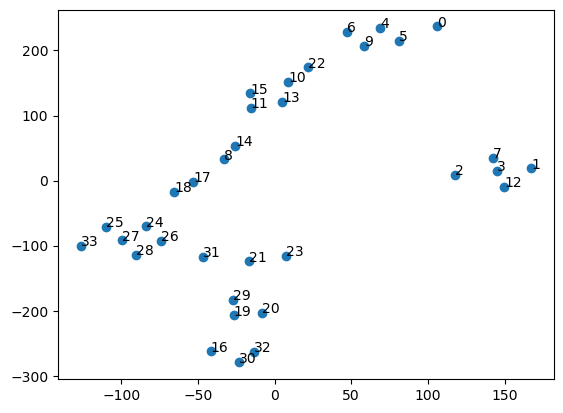

In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# t-SNE 시각화
tsne = TSNE(n_components=2, perplexity=5) # 2차원으로 변환
Z_2d = tsne.fit_transform(Z) # 고차원 벡터 Z를 2차원으로 변환

# 결과 
plt.scatter(Z_2d[:, 0], Z_2d[:, 1])
for i in range(V):
    plt.annotate(i, (Z_2d[i, 0], Z_2d[i, 1]))
plt.show()


t-SNE을 통해 고차원 벡터 Z를 2차원으로 시각화한 후 노드 번호를 플롯팅하여 라벨을 보여준다.

## Question

*Extra Credit* (120 points) [Network Embedding via Random Walks] Find embedding vectors of vertices in a given network based on a random walk-aided approach, the so-called DeepWalk. You may use the NetworkX package to load one of the files “karate_club.adjlist” or “karate_club.edgelist”, which correspond to the adjacency list and edge list, respectively, so that you work on the dataset for the Zachary’s karate club network. Adopt the stochastic gradient descent (SGD) optimizer and hyperparameters set to the following values:
- dimension of each embedding vector (𝑑): 2
- learning rate (𝜂): 0.02
- walk length (𝑡): 10
- window size (𝑤): 3
- walks per vertex (𝛾): 5,
  
which can however be replaced by other ones if another setting leads to a better result. You may set other hyperparameters arbitrarily. Do NOT use any approximation techniques such as Hierarchical Softmax to compute the probability distribution. To show the convergence, plot the loss versus the number of epochs using the above dataset. Additionally, plot all resulting vectors on the two- dimensional space using the t-SNE visualization tool. Make discussions on how the vertices are embedded in comparison with the result based on matrix factorization (refer Problem #1).

## Solution

In [4]:
import networkx as nx
import numpy as np
import random
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

G = nx.read_adjlist("karate_club.adjlist", nodetype=int) # karate_club.adjlist 로드, 정점 타입은 int형으로 지정

# 하이퍼파라미터 설정
walk_length = 10  # 랜덤 워크의 길이
num_walks = 5 # 노드 당 랜덤 워크 수
embedding_dimension = 2 # 임베딩 벡터의 차원
window_size = 3   # Word2Vec 윈도우 크기
learning_rate = 0.02

karate_club.adjlist 파일 (노드 연결 정보 리스트)을 로드하여 노드와 엣지 정보를 얻는다.

그리고 문제에 주어진 하이퍼 파라미터를 설정한다.

In [5]:
def random_walk(graph, start_node, walk_length):
    walk = [start_node] # 시작 노드로 랜덤 워크 초기화
    for _ in range(walk_length - 1):
        neighbors = list(graph.neighbors(walk[-1])) # 현재 노드의 이웃 노드들을 가져옴
        if len(neighbors) > 0:  # 이웃 노드가 존재하면
            walk.append(random.choice(neighbors)) # 이웃 노드 중 하나를 랜덤으로 선택하여 walk에 추가
        else: # 이웃 노드가 없는 경우
            break  # 랜덤 워크 종료
    return walk  # 생성된 랜덤 워크 반환

ramdom_walk는 랜덤 워크를 초기화한 후 지정된 길이만큼 이웃 노드를 가져와 그 중 무작위로 하나를 선택해서 생성된 랜덤 워크를 반환하는 함수다.


In [6]:
# 모든 랜덤 워크를 저장할 리스트
walks = []

# 그래프의 각 노드에 대한 랜덤 워크 생성
for _ in range(num_walks):
    for node in G.nodes():
        walks.append(random_walk(G, node, walk_length))

# Word2Vec 입력 형식에 맞추기 위해 랜덤 워크를 문자열 형태로 변환
walks = [[str(node) for node in walk] for walk in walks]

# skip gram으로 Word2Vec 모델 학습
model = Word2Vec(walks, vector_size=embedding_dimension, window=window_size, sg=1, hs=0, workers=4, epochs=1000, alpha=learning_rate)

# 모든 노드의 임베딩 벡터를 저장할 딕셔너리
embedding_vectors = {}

# 각 노드의 임베딩 벡터 추출
for node in G.nodes():
    embedding_vectors[node] = model.wv[str(node)]

# 임베딩 벡터를 리스트로 변환
Z = np.array([embedding_vectors[node] for node in G.nodes()])

랜덤 워크들을 저장하기 위한 walks 변수를 선언 및 초기화한다.
랜덤 워크 수만큼 노드마다 랜덤 워크를 진행한 후 walks 변수에 넣는다.

그 후 walks 내의 노드들을 문자열 형태로 변환한 후 skip gram 모델을 사용해 word2vec에 넣어 학습시킨다.

key-value 쌍으로 이루어진 딕셔너리에 노드 번호를 key로, 임베딩 벡터를 value로 저장한다.

Z 변수에 t-SNE에 입력하도록 임베딩 벡터를 리스트로 변환한다.

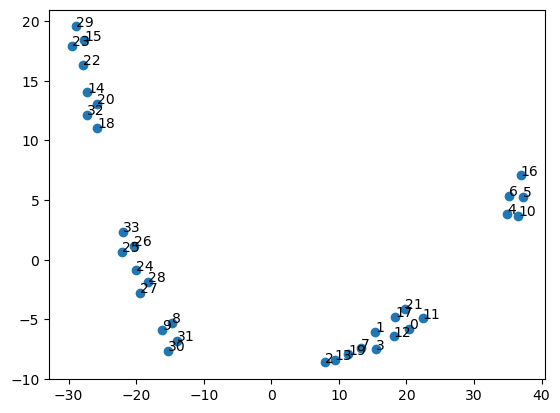

In [7]:
# t-SNE 시각화
tsne = TSNE(n_components=2, perplexity=5) # 2차원으로 변환
Z_2d = tsne.fit_transform(Z)

# 2차원 데이터 포인트 plotting
plt.scatter(Z_2d[:, 0], Z_2d[:, 1])

# 데이터 포인트에 노드 번호 라벨링
for i, node in enumerate(G.nodes()):
    plt.annotate(node, (Z_2d[i, 0], Z_2d[i, 1]))

plt.show()

t-SNE을 통해 고차원 벡터 Z를 2차원으로 시각화한 후 노드 번호를 플롯팅하여 라벨을 보여준다.